# Get dataset

In [8]:
from ogb.graphproppred import PygGraphPropPredDataset
from ogb.io.read_graph_raw import read_csv_graph_raw
import os.path as osp
import pandas as pd

In [9]:
# Download and process data at './dataset/ogbg_molhiv/'
dataset = PygGraphPropPredDataset(name = "ogbg-molhiv", root = 'data/homework02/')

In [10]:
# Print MetaData information from dataset
print(dataset.meta_info)

num tasks                                                                1
eval metric                                                         rocauc
download_name                                                          hiv
version                                                                  1
url                      http://snap.stanford.edu/ogb/data/graphproppre...
add_inverse_edge                                                      True
data type                                                              mol
has_node_attr                                                         True
has_edge_attr                                                         True
task type                                            binary classification
num classes                                                              2
split                                                             scaffold
additional node files                                                 None
additional edge files    

In [11]:
# Get index of the atoms
split_idx = dataset.get_idx_split() 
train_ids = list(map(int, list(split_idx["train"])))
test_ids  = list(map(int, list(split_idx["test"])))
valid_ids = list(map(int, list(split_idx["valid"])))
y = temp = pd.read_csv(osp.join("data/homework02/ogbg_molhiv/raw/graph-label.csv.gz"), compression='gzip', header = None).values
y = [value[0] for value in y]
graphs = read_csv_graph_raw("data/homework02/ogbg_molhiv/raw")

train_graphs = [ graphs[i] for i in train_ids ]
y_train = [ y[i] for i in train_ids ]

test_graphs = [ graphs[i] for i in test_ids ]
y_test = [ y[i] for i in test_ids ]

valid_graphs = [ graphs[i] for i in valid_ids ]
y_valid = [ y[i] for i in valid_ids ]

Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 41127/41127 [00:00<00:00, 348535.92it/s]


# Check graph

In [12]:
''' 
Each graph has:
    'num_nodes': 
        Number of the nodes
    
    'edge_index': 
        Two list. The i° node into 
        first list is connected with i° node into second list
    
    'edge_feat':
        Each edge has three features:
            'bond_type'
            'bond_stereo'
            'conjugated'

    'node_feat':
        Each node has nine features:
            'atomic_num'
            'chirality'
            'degree'
            'formal_charge'
            'num_h'
            'num_rad_e'
            'hybridization'
            'is_aromatic'
            'is_in_ring'
'''
print(graphs[0])
print(type(graphs[0]))


{'edge_index': array([[ 0,  1,  2,  3,  4,  5,  6,  7,  6,  4, 10, 11, 12, 11, 14, 15,
        16, 15,  9, 18],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18,  2,  4]], dtype=int64), 'edge_feat': array([[0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64), 'node_feat': array([[ 5,  0,  4,  5,  3,  0,  2,  0,  0],
       [ 5,  0,  4,  5,  2,  0,  2,  0,  0],
       [ 5,  0,  3,  5,  0,  0,  1,  0,  1],
       [ 7,  0,  2,  6,  0,  0,  1,  0,  1],
       [28,  0,  4,  2,  0,  0,  5,  0,  1],
       [ 7,  0,  2,  6,  0,  0,  1,  0,  1],
       [ 5,  0,  3,  5,  0,  0,  1,  0,  1],
       [ 5,  0,  4,  5,  2,  0,  2,  0,  0],
       [ 5,  0,

In [13]:
print(train_ids[:10],'...', len(train_ids))
print(test_ids[:10],'...', len(test_ids)) 
print(valid_ids[:10],'...', len(valid_ids)) 

[3, 4, 5, 6, 8, 9, 10, 11, 12, 13] ... 32901
[0, 1, 2, 7, 17, 18, 19, 26, 28, 31] ... 4113
[10127, 10129, 10132, 10133, 10134, 10136, 10139, 10140, 10149, 10153] ... 4113


## PapaGraph library

In [14]:
from PapaGraph.PapaGraph import PapaGraph # https://github.com/thalyson004/PapaGraph/blob/main/PapaGraph/src/PapaGraph/PapaGraph/PapaGraph.py
from PapaGraph.convert import convert_from_ogb # https://github.com/thalyson004/PapaGraph/blob/main/PapaGraph/src/PapaGraph/convert/convert.py

In [15]:
graph = convert_from_ogb(graphs[0])
print(graph.edges_number)
print(graph.nodes_number)

40
19


# Task 01

Implemente um algoritmo [Random Walk Strategy R](https://web.stanford.edu/class/cs224w/slides/03-nodeemb.pdf) para gerar o conjunto de vértices que são
percorridos em um passeio aleatório a partir de um vértice de origem $u$. O seu
algoritmo deve gerar um conjunto de $r$ passeios aleatórios enviesados a partir
da origem $u$, com as probabilidades de transição definidas através dos
parâmetros $p$ e $q$ vistos em sala. Você deve escolher os valores de $r$, $p$ e $q$.

In [16]:
from PapaGraph.walk import random_walk_r
random_walk_r(graph, start=0, lenght=10, r=5, p=1.0, q=2.0)

[[0, 1, 0, 1, 2, 9, 6, 7, 8, 7, 6],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0],
 [0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2]]

# Task 02

Implemente o algoritmo node2vec para projetar os vértices , utilizando o
método do gradiente (em sua versão normal ou estocástica) para otimizar a
projeção dos vértices. Você pode usar implementações existentes do
gradiente.

In [18]:
from PapaGraph.feature import node2vec # https://github.com/thalyson004/PapaGraph/blob/main/PapaGraph/src/PapaGraph/feature/node2vec.py

features = node2vec(graph, d=3, r=20, lenght= 5, p=1.0, q=0.5, epochs=10)
for key in features.keys():
    print(key, features[key])

0 [ 0.39914814 -0.27624518  0.05856393]
1 [ 0.04426099 -0.5470282   0.32221627]
2 [ 0.65019816  0.05262391 -0.13769294]
3 [ 0.07382798 -0.22017403  0.34318   ]
4 [ 0.5453529  -0.3244716   0.19830388]
5 [ 0.12186152 -0.38298598  0.01581148]
6 [ 0.35160327 -0.09068904 -0.08415576]
7 [ 0.29526532 -0.14609012  0.09520106]
8 [ 0.21637295 -0.4410184   0.41771188]
9 [ 0.1846557 -0.5884688  0.2617444]
10 [ 0.584652   -0.34647447 -0.02321295]
11 [ 0.73250735 -0.57985413 -0.23270574]
12 [ 0.23201087 -0.3997658  -0.06037172]
13 [ 0.63409305 -0.39228824  0.15352862]
14 [ 0.73160356 -0.4304638  -0.02242015]
15 [ 0.70661414 -0.08163629 -0.12770708]
16 [ 0.83584684  0.03720644 -0.06961846]
17 [ 0.73272634  0.14428914 -0.34669638]
18 [ 0.67709965 -0.47243205 -0.15530863]


# Task 03

Implemente um algoritmo para gerar a projeção de um grafo. O seu algoritmo
deve usar a abordagem de adicionar um vértice adjacente a todos os vértices
do grafo, utilizando então o node2vec para determinar a projeção do vértice
adicionado, que será a projeção do grafo inteiro.

In [20]:
from PapaGraph.feature import graph2vec # https://github.com/thalyson004/PapaGraph/blob/main/PapaGraph/src/PapaGraph/feature/node2vec.py

feature = graph2vec(graph, d= 5, r=3, lenght=5, p=1.0, q=1.0, epochs=5)
print(feature)

[ 0.10132939 -0.17751448 -0.13969803  0.01766401  0.1277518 ]


In [21]:
print(graph.graph_features)
graph2vec(graph, d= 5, r=3, lenght=5, p=1.0, q=1.0, epochs=5, add_feature=True)
print(graph.graph_features)

{}
{'f0': 0.101162866, 'f1': -0.17776242, 'f2': -0.14063692, 'f3': 0.017113658, 'f4': 0.1280033}


# Task 04

Utilize o algoritmo de classificação de sua escolha para operar no dataset
utilizando como entrada o vetor projeção do grafo, bem como outras features
que você considere importante derivar a partir do grafo (as features nos
vértices ou arestas).

In [ ]:
from tqdm.notebook import tqdm
# convert_from_ogb: https://github.com/thalyson004/PapaGraph/blob/main/PapaGraph/src/PapaGraph/convert/convert.py
# print("Converting ...")
# train_papaGraphs = list(map(convert_from_ogb, train_graphs))
# print("Completed!\n", len(train_papaGraphs), "train_graphs!")

# print("Converting ...")
# test_papaGraphs = list(map(convert_from_ogb, test_graphs))
# print("Completed!\n", len(test_papaGraphs), "test_graphs!")

# print("Appling graph2vec on train...")
# for i in tqdm(range(len(train_papaGraphs))):
#     graph2vec(train_papaGraphs[i], d=5, add_feature=True)
# print("Completed!")

# print("Appling graph2vec on test...")
# for i in tqdm(range(len(test_papaGraphs))):
#     graph2vec(test_papaGraphs[i], d=5, add_feature=True)
# print("Completed!")

In [22]:
import pickle 

# pickle.dump(train_papaGraphs, open("train_papaGraphs.obj", 'wb'))
# pickle.dump(test_papaGraphs, open("test_papaGraphs.obj", 'wb'))
train_papaGraphs = pickle.load(open("train_papaGraphs.obj", "rb"))
test_papaGraphs = pickle.load(open("test_papaGraphs.obj", "rb"))

In [23]:
from PapaGraph.convert import toDataFrame # https://github.com/thalyson004/PapaGraph/blob/main/PapaGraph/src/PapaGraph/convert/todata.py
X_train = toDataFrame(train_papaGraphs)
X_test = toDataFrame(test_papaGraphs)
print(X_train)

             f0        f1        f2        f3        f4
0     -0.164738  0.323599  0.343455 -0.474156  0.255364
1     -0.174540  0.107366 -0.058420  0.014378  0.139732
2     -0.086000  0.193167  0.168853  0.064860 -0.190298
3     -0.197152  0.112420 -0.053639  0.009007  0.121829
4     -0.114709  0.319488  0.245707 -0.457126  0.384809
...         ...       ...       ...       ...       ...
32896 -0.031652  0.365228  0.255580 -0.484542  0.290821
32897 -0.316322  0.499218  0.804708 -0.231455  0.388215
32898  0.162916  0.640050  0.406275 -0.372082  0.487431
32899 -0.034381  0.657246  0.525022 -0.443322  0.448297
32900  0.191467  0.461863  0.280935 -0.622993  0.446414

[32901 rows x 5 columns]


In [24]:
from sklearn.svm import SVC

classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
y_pred = list(classifier.predict(X_test))

Accuracy: 94.00 %
Confusion Matrix
[[3831  152]
 [ 111   19]]


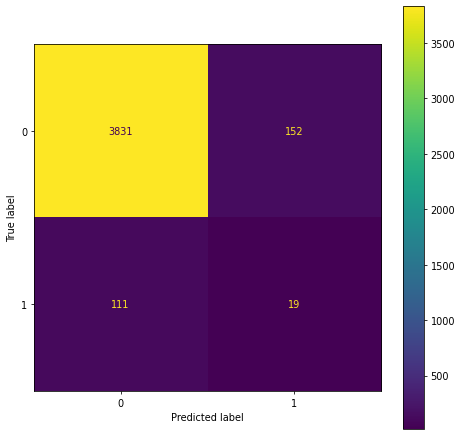

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


print("Accuracy: %2.2f %%" %(round(accuracy_score(y_test, y_pred)*100)))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred), sep="")

figure, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=70)
plot_confusion_matrix(classifier, X_test, y_test, ax=ax)  
plt.show()

# Task 05

Apresente os resultados obtidos pelo seu modelo, utilizando para avaliação o [ROC-AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), e compare os seus resultados com os obtidos [anteriormente](https://paperswithcode.com/sota/graph-property-prediction-on-ogbg-molhiv).

In [27]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.554
